<a href="https://colab.research.google.com/github/vivri1216/HandsOnMachineLearning/blob/master/Chapter10_IntroductionToKerasAndNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples

## MLP for Classificaion

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.18.0'

In [2]:
keras.__version__

'3.8.0'

Now we import the Fashion MNIST dataset. It stores 70000 instances, each one of its instances is a 28x28 array representing an image of a fashion item.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

The data are scaled because the neural network we are going to build will be trained with gradient descent. This iterative algorithm works at its best when the feature space is scaled. In this case we are makin a min-max scaling by hand. Note that the same thing could have aso been achieved using the MinMaxScaler class of Sklearn.

In [10]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train_unraveled = X_train.reshape(-1, 28*28)
X_train_scaled = mm_scaler.fit_transform(X_train_unraveled)

In [11]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now we need to implement the class names list, to know what we are dealing with.

In [13]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

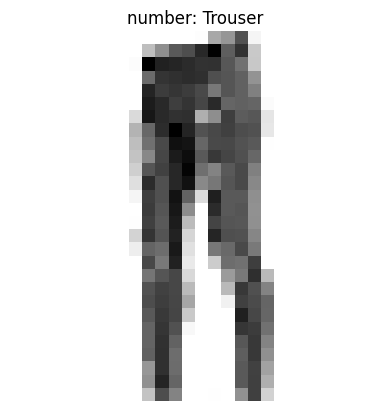

In [17]:
# plotting an example image
import matplotlib.pyplot as plt

image = X_train[56] # changing the index here shows a different number

plt.imshow(image, cmap = "binary")
plt.title(f"number: {class_names[y_train[56]]}")
plt.axis("off")
plt.show()

### Creating the model

Now we create the model using the Sequential API. We build a multi-layer perceptron (MLP) with 4 layers. The first and the last ones are for input and output purposes. Since we are facing a classification problems with mutually exclusive classes, we will use the softmax activation function

$$\begin{equation*}
\sigma(\mathbf{z_i}) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
\end{equation*}$$

TThis function takes values between [0,1], thus it is perfect for classification problems, where our purpose is predicting:

$$P(Y=y|X) = \sigma(z_i)$$

Where $z_i$ in this case represents the input of the last layer flowing to the i-th neuron, whore purpose is predicting the probability of Y being y, given theinput data.

In [19]:
# we will use this one
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]), # preprocessing layer
    keras.layers.Dense(300, activation = "relu"), # 1st hidden layer
    keras.layers.Dense(100, activation = "relu"), # 2nd hidden layer
    keras.layers.Dense(10, activation = "softmax") # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The presence of a preprocessing layer is an arbitrary choice, it is not mandatory. That layer takes the input image array and unravle it, creating a vector of 28*28 entries. It performs the following operation:

In [18]:
X_train_unraveled = X_train.reshape(-1, 28*28)

Nonetheless we could also completely ignore this passage and creating a model that just takes as input a 28 by 28 matrix. Like the following one:

In [ ]:
# alternative form - NOT USED HERE
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28,28]), # input layer
    keras.layers.Dense(300, activation = "relu"), # 1st hidden layer
    keras.layers.Dense(100, activation = "relu"), # 2nd hidden layer
    keras.layers.Dense(10, activation = "softmax") # output layer
])

Using the ReLU (Rectified Linear Unit) activation function is a popular choice in neural networks for several reasons:

1. **Solves the Vanishing Gradient Problem**: In older activation functions like sigmoid or tanh, the gradient can become very small during backpropagation, especially in deep networks. This "vanishing gradient" makes it difficult for the network to learn effectively. ReLU's gradient is either 0 (for negative inputs) or 1 (for positive inputs), which helps prevent this problem, allowing for faster and more stable training.

2. **Computational Efficiency**: ReLU is computationally simple. It only involves a comparison to zero, which is much faster to compute than the exponential and division operations required for sigmoid or tanh. This speed is a significant advantage, especially in large networks and with large datasets.

3. **Sparsity**: ReLU can lead to sparse activation in the hidden layers. If the input to a ReLU unit is negative, the output is zero. This means that some neurons in the network will not activate, which can help to create a more sparse representation. This sparsity can make the model more efficient and potentially less prone to overfitting.

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

For accessing the parameters of a layer:

In [30]:
# weight values are randomly inizialized by default at the creation of the model
weights, biases = hidden1.get_weights()
weights

array([[-0.00880443, -0.01182875, -0.00408207, ..., -0.03100978,
        -0.06356291, -0.0620515 ],
       [ 0.02617738, -0.03635861, -0.06182047, ...,  0.03024075,
        -0.04431473,  0.05247606],
       [-0.04884782, -0.04515529, -0.01854165, ...,  0.05657201,
        -0.00623438,  0.05750176],
       ...,
       [-0.05084545,  0.03282165,  0.06444441, ...,  0.02066552,
        -0.02761117,  0.01304048],
       [ 0.01563812, -0.03051503, -0.01385836, ...,  0.0730394 ,
         0.0253163 , -0.04772391],
       [ 0.06796035,  0.05428667, -0.03539316, ..., -0.00351222,
         0.01615708,  0.00123034]], dtype=float32)

In [31]:
# the biases are set to 0 at the moment of creating the model
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
print(biases.shape, weights.shape)

(300,) (784, 300)


From the dimension of the input matrix note that the activation of one layer can be computed as:

$$A_i = \sigma(W^tA_{i-1} + β)$$

And that an element of the weight matrix W, storing the weights that are to be found between the i-th and the (i-1)-th layer is of the form:

$$w_{zk} = \text{weight conneting the k-th neuron of the (i-1)-th layer to the z-th neuron of the i-th layer}$$

Note that it is the contrary of how I think about things. Originally I learnt about neural networks layer activation to be computed as:

$$A_i = \sigma(WA_{i-1} + β)$$

And that an element of the weight matrix W, storing the weights that are to be found between the i-th and the (i-1)-th layer is of the form:

$$w_{zk} = \text{weight conneting the z-th neuron of the (i-1)-th layer to the k-th neuron of the i-th layer}$$

###  Model Compilation


Now we specify the model training algorithm and loss function to optimize with it. We can also choose to compute different performance metrics.

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # alpha = 0.01 by default
              metrics=["accuracy"])

Here's the cross-entropy formula:
$$
L = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$
The cross entropy reaches its minimun when the two probaiblity distributions over the labels, the true one (y, which assigns probability one to one class and zero to all the others, this is called one-hot encoding) and the model one ($\hat{y}$) , are equal. In this case the cross-entropy value would be equal to the entropy of the true probability distributions. For its form, specifying a certain event, the entropy of the real distribution is zero. Evenually, the cross entropy can also be written as:
$$H(y,\hat y) = H(y) + D(y||\hat y) = D(y||\hat y)$$
being $D(y||\hat y)$ the Kullback-Leibler divergence, an always positive quantity measuring the difference between two probability distributions.

This is just to say that the cross-entropy is a well-defined loss function, with awesome compuational properties and efficiency.

For a list of all the possible optimizers, loss functions and metrics consult the keras documentation online (https://keras.io/)

### Model Training

Now that the we have specified the model structure and compilation form, we can train it. In this case it will be simple, just like we would have done following the sklearn API

In [38]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6835 - loss: 0.9909 - val_accuracy: 0.8322 - val_loss: 0.4961
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8272 - loss: 0.5017 - val_accuracy: 0.8230 - val_loss: 0.4938
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8416 - loss: 0.4522 - val_accuracy: 0.8544 - val_loss: 0.4246
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8536 - loss: 0.4149 - val_accuracy: 0.8640 - val_loss: 0.4048
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8607 - loss: 0.3947 - val_accuracy: 0.8644 - val_loss: 0.3869
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8655 - loss: 0.3852 - val_accuracy: 0.8738 - val_loss: 0.3688
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8718 - loss: 0.3670 - val_accuracy: 0.8682 - val_loss: 0.3702
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8730 - loss: 0.36

The model.fit() method is used to train the model on the provided training data. Let's break down the arguments:

- X_train: This is the training data containing the features (the images). The model will learn from these images to classify them.
- y_train: These are the labels corresponding to the X_train data. Each label indicates the correct category (e.g., "T-shirt", "Trouser") for the corresponding image.
- epochs = 30: An epoch represents one complete pass through the entire training dataset during the training process. Setting epochs = 30 means the model will iterate over the training data 30 times.
- validation_data=(X_val, y_val): This argument provides a separate dataset (X_val for features and y_val for labels) that the model will be evaluated on after each epoch. This is crucial for monitoring the model's performance on unseen data and detecting overfitting.

The model.fit() method returns a History object, which is assigned to the history variable. This history object contains information about the training process, such as the loss and metric values (like accuracy) at each epoch for both the training and validation datasets. This information can be used later to visualize the training progress.

One could have also specified the percentage of training instances to use instead of giving a *validation_data* instance to the fit mehod. Using *validation_split = 0.1* would do the trick, telling keras to use the 10% of training instances for validation purposes.

In [45]:
type(history.history)

dict

In [44]:
history.history

{'accuracy': [0.7648363709449768,
  0.8306727409362793,
  0.8446909189224243,
  0.8537999987602234,
  0.8604363799095154,
  0.8660363554954529,
  0.8709090948104858,
  0.8741272687911987,
  0.8773818016052246,
  0.8812727332115173,
  0.8839636445045471,
  0.8877636194229126,
  0.8895454406738281,
  0.8926181793212891,
  0.8940181732177734,
  0.8966909050941467,
  0.8978727459907532,
  0.8992727398872375,
  0.9015636444091797,
  0.903181791305542,
  0.9063272476196289,
  0.9081454277038574,
  0.9089636206626892,
  0.9107272624969482,
  0.9121090769767761,
  0.9133272767066956,
  0.9160545468330383,
  0.9165090918540955,
  0.918290913105011,
  0.9207090735435486],
 'loss': [0.7127630114555359,
  0.48906636238098145,
  0.44532614946365356,
  0.41638144850730896,
  0.39698299765586853,
  0.3811541497707367,
  0.3664143681526184,
  0.3548427224159241,
  0.3440011739730835,
  0.3334793746471405,
  0.32501474022865295,
  0.3166637420654297,
  0.3094133734703064,
  0.3013996481895447,
  0.2955

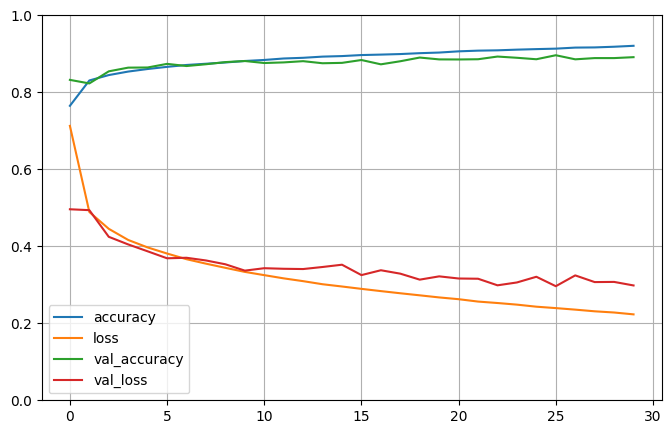

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

By looking at the validation (red) and training (orange) loss curve, we can assum that the model didn't overfit the data during training, since the two curves, except come oscillation given by the stochastic natura of the optimization algorithm (sgd) follow the same trend and are not that distant in value from each other.  

Additionally from the decreasing trend shown in the graph, it could be agood idea to continue the network training until the loss curve reaches an orizontal asymptote. Keras will handle this case automatically by continuing the training, starting from the 30-th epoch of training.

In [47]:
# keep on training
history_continue = model.fit(X_train, y_train, epochs = 10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9215 - loss: 0.2138 - val_accuracy: 0.8936 - val_loss: 0.2995
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9267 - loss: 0.2067 - val_accuracy: 0.8902 - val_loss: 0.2997
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9275 - loss: 0.2035 - val_accuracy: 0.8954 - val_loss: 0.2930
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9269 - loss: 0.2017 - val_accuracy: 0.8950 - val_loss: 0.3016
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9290 - loss: 0.1979 - val_accuracy: 0.8914 - val_loss: 0.3014
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9306 - loss: 0.1947 - val_accuracy: 0.8924 - val_loss: 0.3007
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9299 - loss: 0.1918 - val_accuracy: 0.8768 - val_loss: 0.3323
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9328 - loss: 0.1

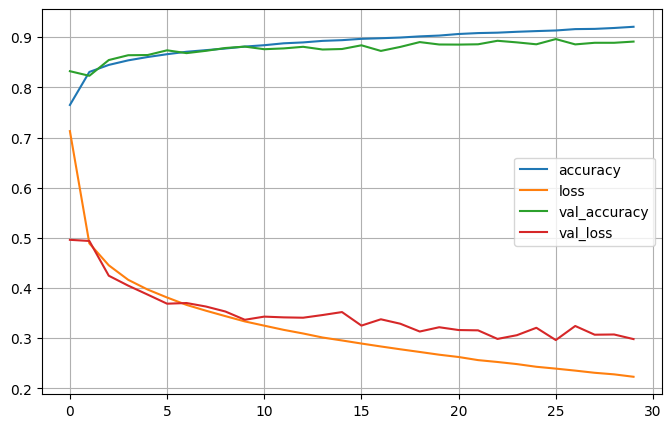

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim()
plt.show()

Note now the difference we start to see in the lower right part of the graph. While the training loss still gets lower, the validation loss starts to get higher. The model is giving overfitting signals, we should stop training and start evaluatung the model on the test set.

### Model Evaluation

The evaluate method will compute the loss function and every one of the specified metrics during the compilation part of the model.

In [50]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8863 - loss: 0.3376


[0.33129507303237915, 0.8870000243186951]

The model can also be used to make predictions on new input values:

In [51]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new) # soft classification
y_proba.round(2) # round the output till the second decimal position

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Here you can see in action the softmax activation function. Note how the output has onlu entries between zero and one.

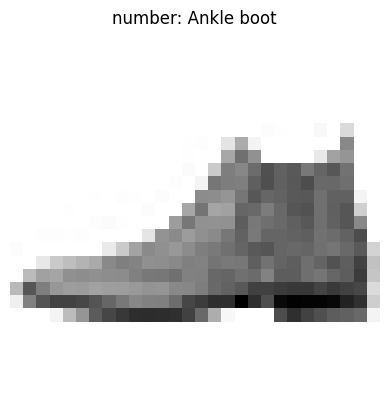

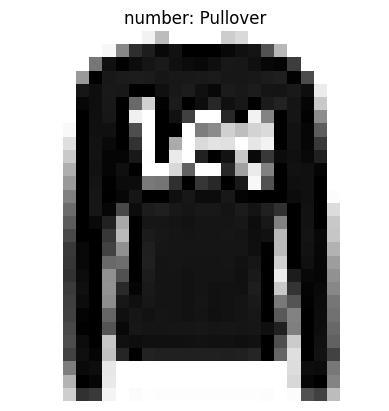

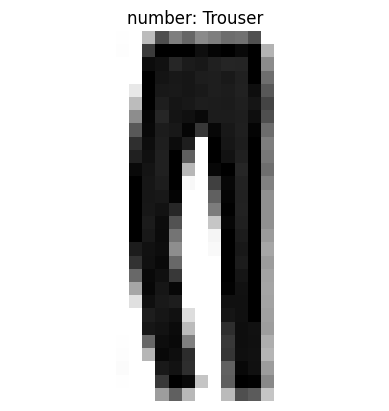

In [58]:
import numpy as np
import matplotlib.pyplot as plt

highest_score_index = np.argmax(y_proba, axis=1)
highest_score_index
images = X_test[:3] # changing the index here shows a different number

for i in range(len(highest_score_index)):
  plt.imshow(images[i], cmap = "binary")
  plt.title(f"number: {class_names[y_test[i]]}")
  plt.axis("off")
  plt.show()

## MLP for Regression

Now we will swtich to the California Housing problem and tackle it using a regression neural network.

In [59]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
housing = fetch_california_housing()

# creating test set
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
# creating validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

(8,)

In [61]:
# standardizing the input values
scaler = StandardScaler()
X_train, X_valid, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_valid), scaler.fit_transform(X_test)

In [62]:
# model building
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
# model compilation
model.compile(loss = "mean_squared_error", optimizer = "sgd")

# model training
history  = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5328 - val_loss: 1.2222
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0235 - val_loss: 0.5033
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4902 - val_loss: 0.5486
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4718 - val_loss: 0.6951
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4541 - val_loss: 0.7576
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4410 - val_loss: 0.8538
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4262 - val_loss: 0.9596
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4252 - val_loss: 1.1046
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4026 - val_loss: 1.2626
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4174 - val_loss: 1.3906
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4020 - val_loss: 1.5606
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0

In [66]:
# model evaluation
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

We only have one output node, given that we just want to predict one value. Let's asses model training and validation performance. Has it overfitted the data?

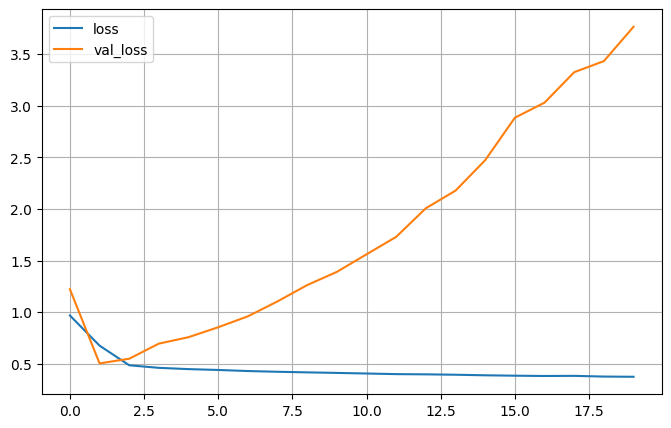

In [72]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Note how the validation loss explodes after 5 epochs of training. This is a common case of overfitting: our model has lost generality.

In [73]:
model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27951.4922


27872.55859375

## Complex non-sequential models

The Sequential API is very useful to create sequential models, which are a very important class of neural networks.

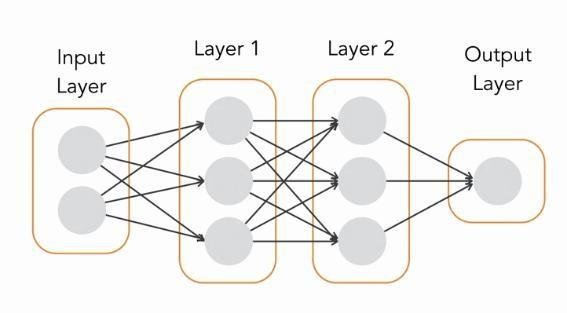

However, sometimes, we may need to work with more complex network structure. In order to do that, we may use the Functional API. Let's create a Wide&Deep network:
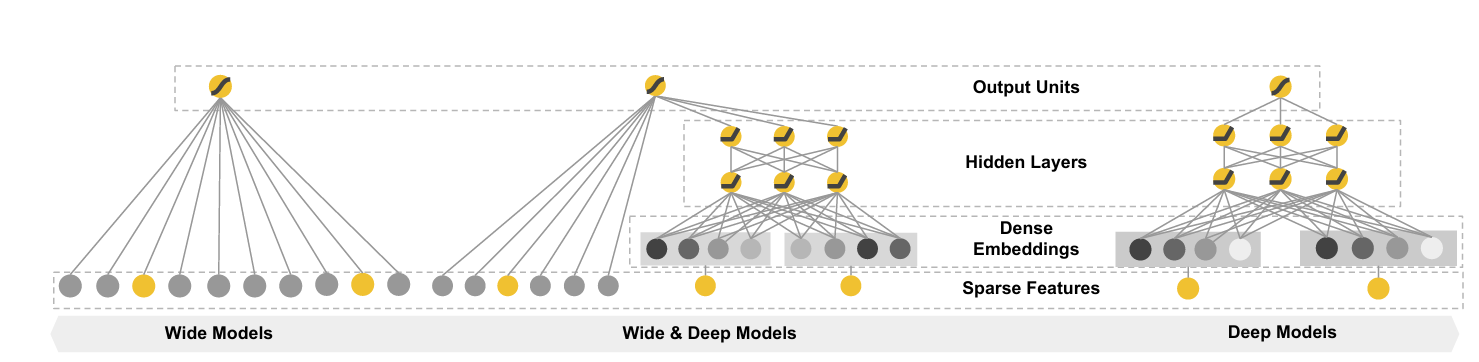

In [75]:
# layer building with f(x) structure specification form
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
# model building
model = keras.Model(inputs = [input_], outputs = [output])

This API is called functional because the structure of network is specified by:
1. defining the layer form
2. defining its inpus using an f(x) like form, where x represents the input values, that is to say the nearest precedent layer


In [76]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

For the rest, the compiling, training and evaluating steps work like before. But what if we want to specify multiple inputs to different part of the network?

In [101]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [109]:
# layer building with f(x) structure specification form
input_A = keras.layers.Input(shape=[5], name = "wide_input")
input_B = keras.layers.Input(shape=[6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation="relu", name = "hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name = "hidden2")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2], name = "concat")
output = keras.layers.Dense(1, name = "output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
# model building
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])
# model compiling
model.compile(loss = ["categorical_crossentropy", "categorical_crossentropy"], loss_weights=[0.9,0.1], optimizer="sgd")

In [110]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden1 (Dense)     │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden2 (Dense)     │ (None, 30)        │        930 │ hidden1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ hidden2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concat[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ hidden2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

The model performance in the case of multiple outputs will be computed as a mean over all the outputs performances. However an auxiliary output is just useful for regularization purposes, thus we may want its performance to weight considerably less in the overall model performance. Fotunately we can specify the weight to assign to every output performance, so that the overall performance will be compute as a weighted average, with the given weights. In this case the overall performance will be made up with 90% of the main output p. and 10% of the auxiliary output p.   

In [111]:
# model training
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs = 20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
    )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 2.4751e-07 - loss: 2.4751e-07 - output_loss: 2.4751e-07 - val_aux_output_loss: 2.4722e-07 - val_loss: 2.4723e-07 - val_output_loss: 2.4722e-07
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - aux_output_loss: 2.4445e-07 - loss: 2.4445e-07 - output_loss: 2.4445e-07 - val_aux_output_loss: 2.4722e-07 - val_loss: 2.4723e-07 - val_output_loss: 2.4722e-07
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 2.4567e-07 - loss: 2.4567e-07 - output_loss: 2.4567e-07 - val_aux_output_loss: 2.4722e-07 - val_loss: 2.4723e-07 - val_output_loss: 2.4722e-07
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - aux_output_loss: 2.4373e-07 - loss: 2.4373e-07 - output_loss: 2.4373e-07 - val_aux_output_loss: 2.4722e-07 - val_loss: 2.4723e-07 - val_output_loss: 2.4722e-07
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - aux_output_loss: 2.4523e-07 - loss: 2.4523e-07 - output_loss: 2.4523e-07 - val_aux_output_loss: 2.472

In [113]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(total_loss, main_loss, aux_loss)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - aux_output_loss: 2.4698e-07 - loss: 2.4698e-07 - output_loss: 2.4698e-07
2.4922587726905476e-07 2.492075736881816e-07 2.492075736881816e-07


When we train the model we need to provid labels and inputs for each output and input layers in the structure we built. In this case we have two output ll. and two input ll. We will have to provide two inputs and two true outputs in order to compute the output performance measure (the mse loss here) and train the model.  

## Saving and Restoring models, setting checkpoints  

Training a neural network takes a lot of time. When we are finished training one, we better save it for future uses. Keras will use a format called HDF5, that must be specified in the saving name for the model.

In [ ]:
# saving the model
model.save("my_keras_model,h5")
# loading the model (it must be found in the wd)
model = keras.models.load_model("my_keras_model.h5")

But when training takes several hours, we may want to use the model while it is still training. For this reason we can set checkpoints during training, so that the training will restart from the last checkpoint in case something goes wrong (meteorites, deluges, crashes, plague).  

In [ ]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("my_saved_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks = [checkpoint_cb])

This way we could also implement a form of **early stopping**. Early stopping means that we stop the training when the loss function doesn't get lower after a given number of iterations (*patience* value) of the optimization algorithm. It is enough setting to True the save_best_only parameter. This way only one model will be saved, he bet one so far, wrt to validation set performance.

In [ ]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("my_saved_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data=(X_valid, y_valid),
                    callbacks = [checkpoint_cb])


For doing the same thing we could also use the apposite EarlyStopping class:

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                  restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Both EarlyStopping and ModelCheckpoint are Callbacks, a class of objects that can be specified under the *callback* argument of the *fit* model method. If specified Keras will call these Callbacks objects ciclically at the end and stat of each step of training (epoch, batch usage). There are a lot of them, each having a particular use case. Here we used two of them, for saving the model periodiclly during training (ModelCheckpoint) and for implementing early stopping (EarlyStopping)

## Tuning the hyperparameters of a neural network

A neural network is vrey flexible, mainly beacuse it can be tweaked in a lot of ways. You can change the number of hidden layers, the number of neurons in each layer, the structure, the learning rate and so on. The most important of them, dependeing from all the others is the learning rate. This property makes them very powerful but also very difficult to make them work at their best.

As a rule of thumb:
- the number of hidden layers depend strictly on the problem. Theoretically a one layer network could solve every problem, provided it has enough neurons. However using hidden layers make training more efficient and the model more understandable. It also enable knowledge transmission over different problems
- In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons
- The learning rate depends upon all the other hyperparameters, especially the batch size, so if you modify any of them, make sure to update the learning rate as well
- As a rule of thumb, the optimal learning rate is half the maximum learning rate, being it the one on which makes the training algorithm diverge

Even if there's a lot of heuristic involving hyperparameter tuning for neural networks, a more theoretical and precise approach is needed

For finding the best set of hyperparameters a solution could be using the sklearn API and its implemented GridSearchCV and RandomSearchCV. The last one is better suited for this task, not knowing a priori nothing about the best hyperparameters to choose.

In [114]:
# build a sklearn like function so that its inputs reflect the hyperparameters we want to fine-tune
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
# this allows to use the model just as we would do with other models in sklearn
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Now we have that *keras_reg* can be used just like any other model native of sklearn. Now it has the moethods:
- *fit*: working like it did in keras
- *score*: working like in sklearn. It takes as performance measure the one specified during the compiling phase of the model. Remember that in sklearn scores and not loss functions are used. In this case, the higher score, the better the model
- *predict*: like in Keras

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# implementing sklearn RandomSearch
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
# performing random search over the specified parameters
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
# get the best set of hyperparameters
rnd_search_cv.best_params_
# best score obtained
rnd_search_cv.best_score_
# the best model
rnd_search_cv.best_estimator_
# saving the best model
model = rnd_search_cv.best_estimator_.model
# evaluating the model using the specified performance measure
model.evaluate(X_test, y_test)

Using sklearn is a way. A lot of other libraries are dedicated to find the best model when the hyperparameters space is very complex. You mmay want to check out:
- Keras Tuner
- Scikit-Optimize
- Hyperopt
- Sklearn-Deap

## Further Readings
- Smith, Best practices on hyperparameter tuning: https://arxiv.org/pdf/1803.09820
- Cheng et al, Wide and Deep Learning for Reccomender Systems: https://arxiv.org/pdf/1606.07792
- Li et al,  Hyperband: A Novel Bandit-Based Approach to
 Hyperparameter Optimization: https://arxiv.org/pdf/1603.06560
- Jaderberg et al, Population Based Training of Neural Networks: https://arxiv.org/pdf/1711.09846

# Exercises

1. Utilizza playground.tensorflow.org per visualizzare come funzioni una semplice rete neurale e l'effetto che gli iperparametri hanno su di essa (profondita, numero di neuroni in ogni layer, funzioni di attivazione...)